In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Some helpful function 
# Change the categorical data to numerical data
def Encoding(data):
    # create the encoder variable
    le_encoder = LabelEncoder()
    # Extract the categoral data
    cat_df = df.select_dtypes(include=['object'])
    # Encode the categorecal data
    for i in cat_df:
        df[i] = le_encoder.fit_transform(df[i])
    return df

# Function for analusis of data
def data_analysis(data):
    # The shape of the data
    print("The shape of the data set:")
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print("The existence of missing values in each column:")
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print("General information about the data:")
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of unique values in each column:")
    print(data.nunique())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of duplicates in df:", data.duplicated().sum())

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
data_analysis(df)

The shape of the data set:
The data set consists of 1338 rows and 7 columns.

***********************************************
The existence of missing values in each column:
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

***********************************************
The number of unique values i

# Preprocessing & Scaling the data

### Drop Duplicates

In [4]:
df = df.drop_duplicates()

### Encode the categorical data

##### for trianing a linear regression model, we need all the input data to be numerical

In [5]:
df = Encoding(df)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

# Splitting the data into train and test:

In [8]:
# splitting the data before scaling
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.3,random_state=42)

# splitting the data after scaling
X_train_sc, X_test_sc, y_train, y_test = train_test_split( x_sc, y, test_size = 0.3,random_state=42)

# Modeling using Sklearn:

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create object of LR class in sklearn
lr = LinearRegression()
# train the model using train data
lr.fit(X_train, y_train)

# get the predicted target values
y_pred = lr.predict(X_test)
# find the godness of fit
r2 = r2_score(y_test, y_pred)
# get the mean square error
mse = mean_squared_error(y_test, y_pred)
# get the root mean square error
rmse = np.sqrt(mse)

###################### with scaling ###################################
# create object of LR class in sklearn
lr_sc = LinearRegression()
# train the model using train data
lr_sc.fit(X_train_sc, y_train)

# get the predicted target values
y_pred_sc = lr_sc.predict(X_test_sc)
# find the godness of fit
r2_sc = r2_score(y_test, y_pred_sc)
# get the mean square error
mse_sc = mean_squared_error(y_test, y_pred_sc)
# get the root mean square error
rmse_sc = np.sqrt(mse_sc)

print("The R2 score:", r2)
print("the mean square error:", mse,)
print("the root mean square error:", rmse)
print("#############################################")
print("The R2 score with scaling:", r2_sc)
print("the mean square error with scaling:", mse_sc)
print("the root mean square error with scaling:", rmse_sc)

The R2 score: 0.7724652729621759
the mean square error: 38935221.01064074
the root mean square error: 6239.80937294087
#############################################
The R2 score with scaling: 0.7724652729621759
the mean square error with scaling: 38935221.01064075
the root mean square error with scaling: 6239.809372940871


In [10]:
predictions = pd.DataFrame({"Actual": y_pred, "Predicted": y_test})
predictions

,Actual,Predicted
0,7992.222486,8688.85885
1,5341.353260,5708.86700
2,14378.731881,11436.73815
3,31440.552933,38746.35510
4,9078.428786,4463.20510
...,...,...
397,7250.617301,5148.55260
398,14090.074817,11363.28320
399,12271.447028,10600.54830
400,13641.915998,13429.03540


#### Plotting the actual and predicted value of SKlearn LR

<Figure size 1500x1000 with 0 Axes>

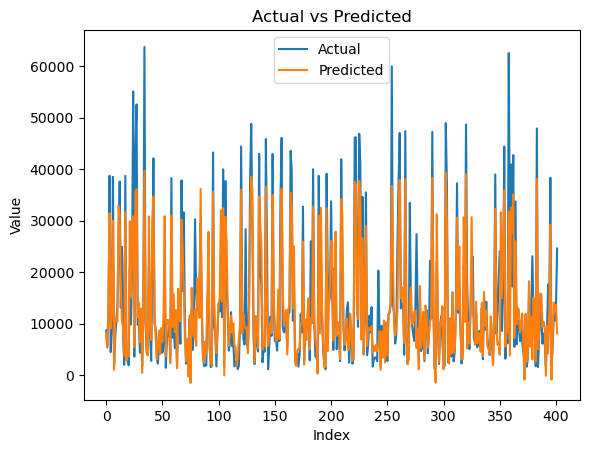

In [11]:
plt.figure(figsize=(15,10))
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(y_test, label='Actual')

# Plot the predicted values
ax.plot(y_pred, label='Predicted')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted')

# Show the legend
ax.legend()

# Scratch Multiple LR Implementation:

The prediction of the Miltiple LR model: 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$

The gradient descent algorithm is:
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{N} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{N} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

The total mean square error (difference between actual & predicted):
$$
MSE = \frac{1}{n} (yhat  - ytrue)^2
$$

The R2 Score (goodness of fit):
$$
R2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum\limits_{i = 0}^{N}(yhat  - ytrue)^2}{\sum\limits_{i = 0}^{N}(ytrue  - ybar)^2} 
$$


#### Intuation of linear regression class:
1.	Initialize the weights and Bias with zero
2.	Predict the target from a given data point through:
 $y = wx + b$
3.	 Calculate the error using mean square error
4.	Use gradient descent to find new weights and Bias with min error
5.	Repeat for n times until the derivative = 0, which corresponds to reaching the global minima of the function, but it is optional according to the user


In [12]:
class LinearRegressionScratch:
    # should initialize the model with number of learning iterations
    # also define the step during updating the Wieghts and Bais
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_history = []

    def cost_function(self, x, y):
        cost = np.sum((((x.dot(self.weight) + self.bais) - y) ** 2) / (2 * len(y)))
        return cost

    def GradientDescent(self, x, y):
        # get the number of samples needed in equation of derivatives 
        self.no_samples, self.no_features = x.shape
        # initialize the weight matrix with zeros at first
        self.weight = np.zeros(x.shape[1])
        # initialize the bais with zero at first
        self.bais = 0

        for itteration in range(self.iterations):
            # get the predicted point
            z = np.dot(x, self.weight) + self.bais
            # find the difference between predicted point and actual
            loss = z - y
            # find the derivative of wieght and bais according to euations
            # took the transpose of X from (columns x rows) to (rows x columns) 
            # as the dimension of W matrix = (rows x 1)
            # this will produce matrix = (columns x 1)
            dw = np.dot(x.T, loss) / self.no_samples
            db = np.sum(loss) / self.no_samples
            # update the weights and bais to decrease the error
            self.weight -= self.learning_rate * dw
            self.bais -= self.learning_rate * db
            
            # add the cost function of each iteration
            cost = self.cost_function(x, y)
            self.cost_history.append(cost)
            # print the cost after each cycle itteration
            if (itteration % (self.iterations / 10) == 0):
                print("Cost is:", cost)

        return self.weight, self.bais, self.cost_history
    
    # predict the values of target
    def predict(self, X):
        return X.dot(self.weight) + self.bais
    
    def r2score(self, y_pred, y):
        y_mean = y.mean()
        ssr = np.sum((y_pred - y) ** 2)
        sst = np.sum((y-y_mean) ** 2)
        r2 = 1 - (ssr / sst)
#         r2 = round(r2, 2)
        return r2
    
    def mse(self, y_pred, y):
        error = (1 / len(y)) * (np.sum((y_pred - y) ** 2))
#         error = round(error, 2)
        return error


### At small learning rate "0.001"

Cost is: 152582902.80748457
Cost is: 117784906.11105102
Cost is: 92021618.90703791
Cost is: 72936615.72670704
Cost is: 58790773.34197101
Cost is: 48299877.794499755
Cost is: 40515123.69828756
Cost is: 34735133.51300702
Cost is: 30441150.627211507
Cost is: 27249278.22406529


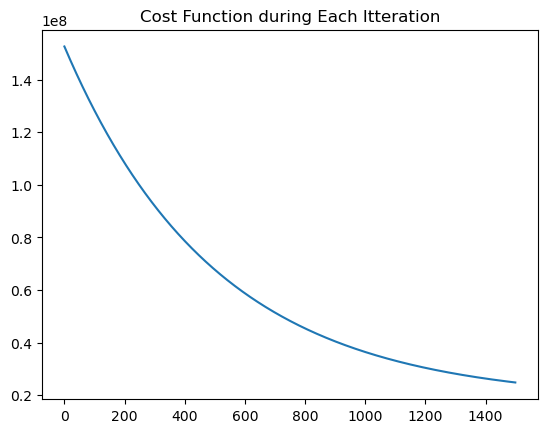

#######################################################
The Evaluation:
The R2 score: 0.6249613873117902
the mean square error: 64175747.86336749


In [13]:
lr_scratch = LinearRegressionScratch(0.001, 1500)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

### At large learning rate "2"

Cost is: 154652666.13245147
Cost is: 2273474046.4261565
Cost is: 500976368874.3539
Cost is: 284615038437027.1
Cost is: 1.7112205513262416e+17
Cost is: 1.0308992190933316e+20
Cost is: 6.210919145872315e+22
Cost is: 3.7419376559355403e+25
Cost is: 2.254432589433695e+28
Cost is: 1.3582445196739822e+31


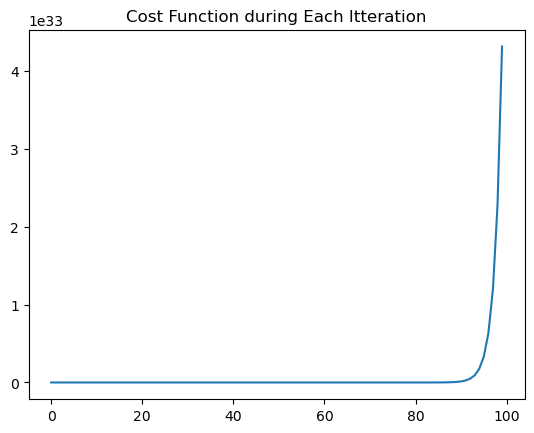

#######################################################
The Evaluation:
The R2 score: -4.869364719615262e+25
the mean square error: 8.332345308684269e+33


In [14]:
lr_scratch = LinearRegressionScratch(2, 100)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

### At suitable learningrate and itterations "0.01"

Cost is: 150174807.8228341
Cost is: 17921434.13080665
Cost is: 17921434.13062047
Cost is: 17921434.130620472
Cost is: 17921434.130620472
Cost is: 17921434.130620472
Cost is: 17921434.130620472
Cost is: 17921434.130620472
Cost is: 17921434.130620472
Cost is: 17921434.130620472


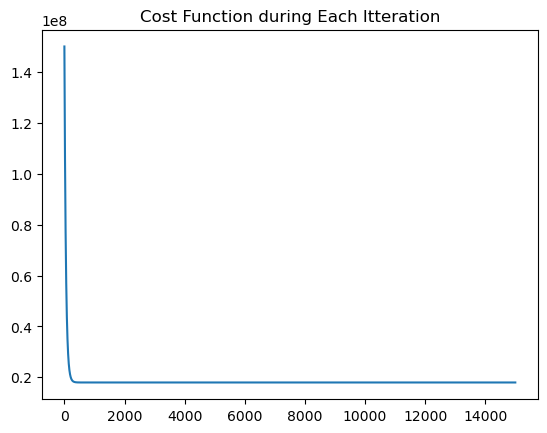

#######################################################
The Evaluation:
The R2 score: 0.7724652729621737
the mean square error: 38935221.01064111


In [15]:
lr_scratch = LinearRegressionScratch(0.01, 15000)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

##### Predicting a random sample from training data:

In [16]:
x_sample = X_train_sc[2]
y_sample = lr_scratch.predict(x_sample)
print(f"the Actual value: {y_train[2]}, the predicated value: {y_sample}")

the Actual value: 42112.2356, the predicated value: 32725.979448304723


#### Plotting the actual and predicted value of scratch LR

<Figure size 1500x1000 with 0 Axes>

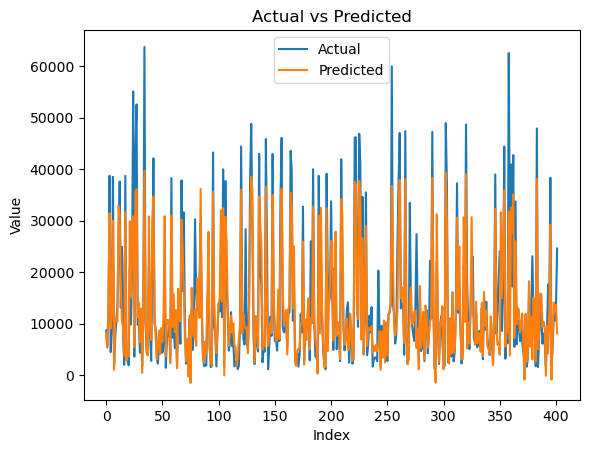

In [17]:
plt.figure(figsize=(15,10))
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(y_test, label='Actual')

# Plot the predicted values
ax.plot(y_pred_scratch, label='Predicted')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted')

# Show the legend
ax.legend()